Market Size Share by Industry
Tamino Gaub  
12314484  
<tamino.gaub@student.uibk.ac.at> 

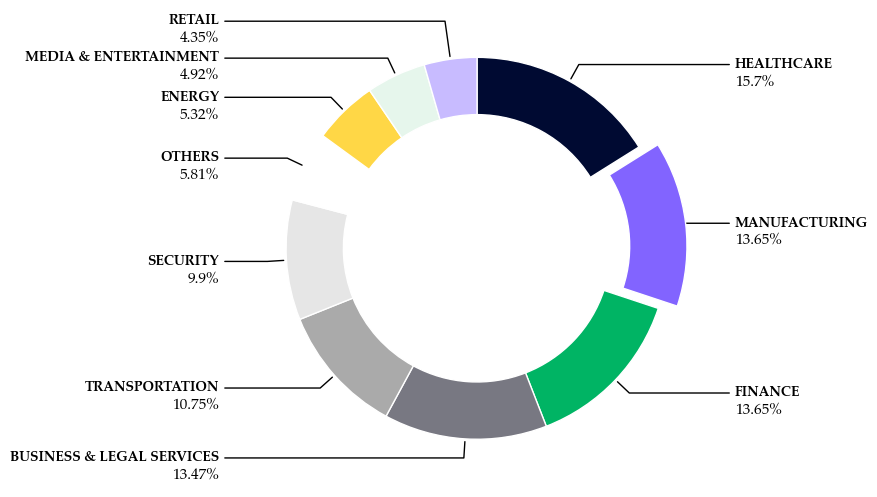

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rcParams

# Load Fonts
palatino_bold = fm.FontProperties(fname=r"c:\WINDOWS\Fonts\PALAB.TTF")
palatino_regular = fm.FontProperties(fname=r"c:\WINDOWS\Fonts\PALA.TTF")

# Data taken from 'https://en.statista.com/outlook/tmo/artificial-intelligence/worldwide?currency=USD' (accessed on 24.04.2025)

# Data for the pie chart
labels = ['HEALTHCARE', 'MANUFACTURING', 'FINANCE', 'BUSINESS & LEGAL SERVICES',
          'TRANSPORTATION', 'SECURITY', 'OTHERS', 'ENERGY',
           'MEDIA & ENTERTAINMENT', 'RETAIL']

sizes = [15.7, 13.65, 13.65, 13.47, 10.75, 9.9, 5.81, 5.32, 4.92, 4.35]

colors = [
    '#000a32',
    '#00b464',
    '#8264ff',
    '#787882',
    '#aaaaaa',
    '#e6e6e6',
    '#ffffff',
    '#ffd746',
    '#E6F6EC',
    '#C8BBFF'
]

# Sort data by size in descending order
sort_indices = np.argsort(sizes)[::-1]
sorted_labels = [labels[i] for i in sort_indices]
sorted_sizes = [sizes[i] for i in sort_indices]
sorted_colors = [colors[i] for i in sort_indices]

# Switch Finance and Manufacturing
i1 = sorted_labels.index('FINANCE')
i2 = sorted_labels.index('MANUFACTURING')
for arr in (sorted_labels, sorted_sizes, sorted_colors):
    arr[i1], arr[i2] = arr[i2], arr[i1]

# Recreate sorted_sizes and sorted_colors after switching
sorted_sizes = [sizes[i] for i in sort_indices]
sorted_colors = [colors[i] for i in sort_indices]

# Explode the 'MANUFACTURING' slice
manufacturing_index = sorted_labels.index('MANUFACTURING')
sorted_explode = [0] * len(sorted_labels)
sorted_explode[manufacturing_index] = 0.1

fig, ax = plt.subplots(figsize=(6.2, 6.2)) # Adjusted figure size for better layout in LaTeX

# Pie chart
wedges, texts = ax.pie(sorted_sizes,
                       #radius=0.95,
                       wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'width': 0.3},
                       explode=sorted_explode,
                       colors=sorted_colors,
                       startangle=90,
                       counterclock=False)

# Annotations
kw = dict(arrowprops=dict(arrowstyle="-"),
          zorder=0, va="center")

# Position adjustments for specific labels
retail_index = sorted_labels.index('RETAIL')
media_index = sorted_labels.index('MEDIA & ENTERTAINMENT')
position_adjustments = {
    'RETAIL': {'y_offset': -0.3},
    'MEDIA & ENTERTAINMENT': {'y_offset': 0.3}
}

# Annotations with arrows
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang)) 
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    label_text = f"{sorted_labels[i]}\n{sorted_sizes[i]}%"
    y_offset = 1.1*y
    if sorted_labels[i] in ['RETAIL', 'MEDIA & ENTERTAINMENT']:
        y_offset += 0.10 if sorted_labels[i] == 'RETAIL' else -0.00

    ax.annotate(label_text,
                xy=(x, y),
                xytext=(1.35*np.sign(x), y_offset),
                horizontalalignment=horizontalalignment,
                fontproperties=palatino_bold,
                fontsize=11,
                **kw)

# Edit Labels: Category bold, Percentage normal
for text in ax.texts:
    lines = text.get_text().split('\n')
    if len(lines) > 1:
        category, percentage = lines
        text.set_text('')
        # Category with Palatino Bold
        text.set_text(category)
        text.set_fontproperties(palatino_bold)

        # Percentage below with Palatino Regular
        ax.text(text.get_position()[0], text.get_position()[1] - 0.05,
                percentage,
                ha=text.get_ha(),
                va='top',
                fontproperties=palatino_regular,
                fontsize=11)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_aspect('equal')
ax.axis('off')

# Plot and save figure
plt.savefig('Plot Outputs/02_MarketSizeShareByIndustry.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()